In [1]:
# Pandas is an open source Python package that provides numerous tools for data analysis.
# Numpy is the fundamental package for scientific computing with Python. 
import pandas as pd #pd is an alias pointing to pandas
import numpy as np # np is an alias pointing to numpy

# Seed the generator to make this notebook's output stable across runs
np.random.seed(89)
from datetime import datetime
import random

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt #pyplot is matplotlib's plotting framework https://matplotlib.org/users/pyplot_tutorial.html
from matplotlib.colors import ListedColormap # Learn more about matplotlib.colors here https://matplotlib.org/3.1.1/api/colors_api.html
import seaborn as sns # sns is an alias pointing to seaborn

# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Split validation
from sklearn.model_selection import train_test_split

# GridSearchCV, KFold and Cross-Validation Score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [2]:
train = pd.read_csv('C:\\Users\\cassi\\Desktop\\ML Project\\Project Data\\ProjectTrainingData.csv')

In [3]:
# Look at basics of Dataframe df.# Look at basics of Dataframe 
print(train.head(5))
print(train.columns)

             id  click      hour    C1  banner_pos   site_id site_domain  \
0  1.000009e+18      0  14102100  1005           0  1fbe01fe    f3845767   
1  1.000017e+19      0  14102100  1005           0  1fbe01fe    f3845767   
2  1.000037e+19      0  14102100  1005           0  1fbe01fe    f3845767   
3  1.000064e+19      0  14102100  1005           0  1fbe01fe    f3845767   
4  1.000068e+19      0  14102100  1005           1  fe8cc448    9166c161   

  site_category    app_id app_domain  ... device_type device_conn_type    C14  \
0      28905ebd  ecad2386   7801e8d9  ...           1                2  15706   
1      28905ebd  ecad2386   7801e8d9  ...           1                0  15704   
2      28905ebd  ecad2386   7801e8d9  ...           1                0  15704   
3      28905ebd  ecad2386   7801e8d9  ...           1                0  15706   
4      0569f928  ecad2386   7801e8d9  ...           1                0  18993   

   C15  C16   C17  C18  C19     C20  C21  
0  320   50  

In [4]:
# Print columns
print(train.columns)

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')


In [5]:
# Print data types of columns
print(train.dtypes)

id                  float64
click                 int64
hour                  int64
C1                    int64
banner_pos            int64
site_id              object
site_domain          object
site_category        object
app_id               object
app_domain           object
app_category         object
device_id            object
device_ip            object
device_model         object
device_type           int64
device_conn_type      int64
C14                   int64
C15                   int64
C16                   int64
C17                   int64
C18                   int64
C19                   int64
C20                   int64
C21                   int64
dtype: object


In [6]:
# Print info
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991090 entries, 0 to 31991089
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 5.7+ GB
None


In [7]:
# Print missing values by column 
print(train.isnull().sum(axis = 0))


id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64


In [8]:
# Print total number of missing values in rows
print(train.isnull().sum(axis = 1).sum())


0


In [9]:
# Change the hour column to a datetime and extract hour of day
train['hour'] = pd.to_datetime(train['hour'], format = '%y%m%d%H')
train['hour_of_day'] = train['hour'].dt.hour
print(train.head(5))


             id  click       hour    C1  banner_pos   site_id site_domain  \
0  1.000009e+18      0 2014-10-21  1005           0  1fbe01fe    f3845767   
1  1.000017e+19      0 2014-10-21  1005           0  1fbe01fe    f3845767   
2  1.000037e+19      0 2014-10-21  1005           0  1fbe01fe    f3845767   
3  1.000064e+19      0 2014-10-21  1005           0  1fbe01fe    f3845767   
4  1.000068e+19      0 2014-10-21  1005           1  fe8cc448    9166c161   

  site_category    app_id app_domain  ... device_conn_type    C14  C15 C16  \
0      28905ebd  ecad2386   7801e8d9  ...                2  15706  320  50   
1      28905ebd  ecad2386   7801e8d9  ...                0  15704  320  50   
2      28905ebd  ecad2386   7801e8d9  ...                0  15704  320  50   
3      28905ebd  ecad2386   7801e8d9  ...                0  15706  320  50   
4      0569f928  ecad2386   7801e8d9  ...                0  18993  320  50   

    C17  C18  C19     C20  C21  hour_of_day  
0  1722    0   35     

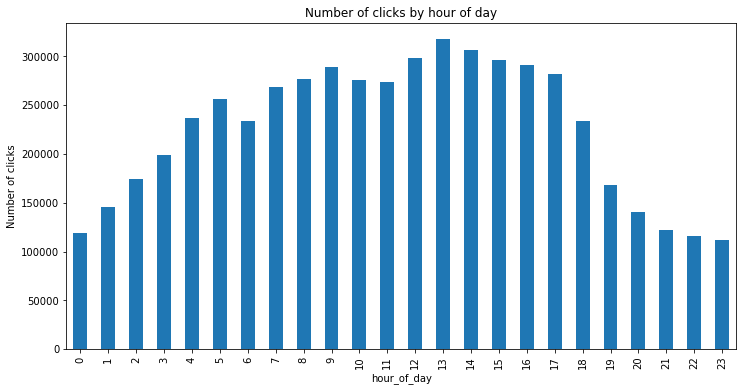

In [10]:
# Get and plot total clicks by hour of day
train.groupby('hour_of_day')['click'].sum().plot.bar(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour of day')
plt.show()


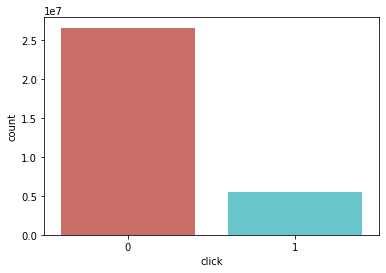

In [11]:
sns.countplot(x='click',data=train, palette='hls')
plt.show()

In [13]:
# Click through rate is ~ 17%
train['click'].value_counts()/len(train)

0    0.83011
1    0.16989
Name: click, dtype: float64

In [14]:
train.hour.describe()

C:\Users\cassi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                31991090
unique                    216
top       2014-10-22 09:00:00
freq                   395537
first     2014-10-21 00:00:00
last      2014-10-29 23:00:00
Name: hour, dtype: object

In [15]:
# Hourly clicks pattern looks pretty similar every day 
# However, there were a couple of peak hours: 
# one is sometime in the mid of the day on Oct 22 
# another is sometime in the mid of the day on Oct 28 
# one very low click hour is close to mid-night on Oct 24

Text(0.5, 1.0, 'Number of clicks by hour')

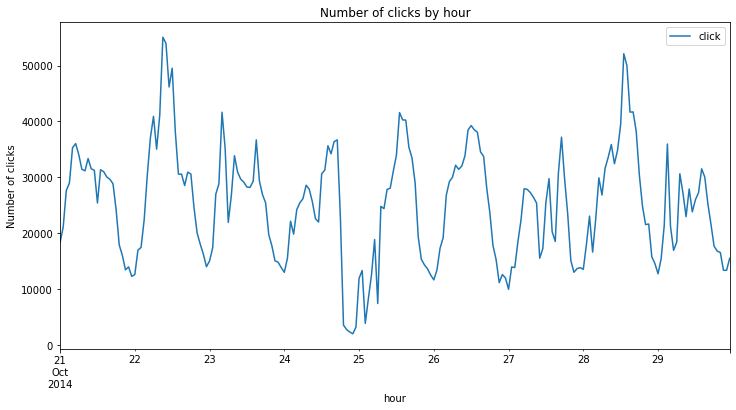

In [16]:
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour')

## Feature engineering for date time features

In [17]:
# Extract hour from date time feature

# highest number of clicks is at hour 13 and 14 (1pm and 2pm), 
# lowest number of clicks is at hour 23 and 0 (11pm and mid-night)

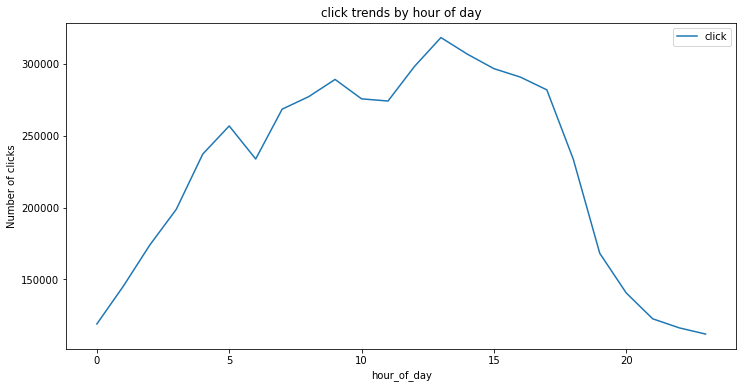

In [18]:
train['hour_of_day'] = train.hour.apply(lambda x: x.hour)
train.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

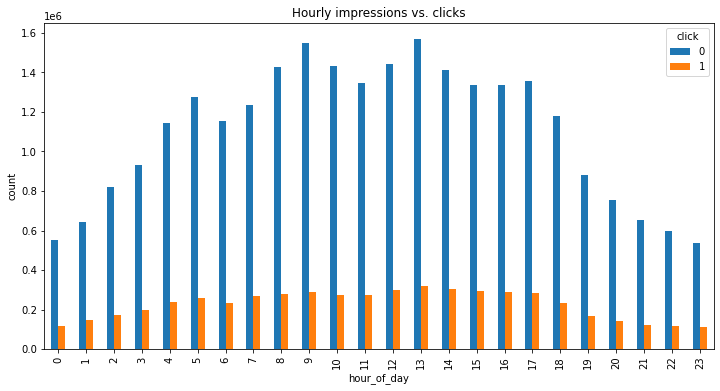

In [19]:
# Looking at impressions

train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

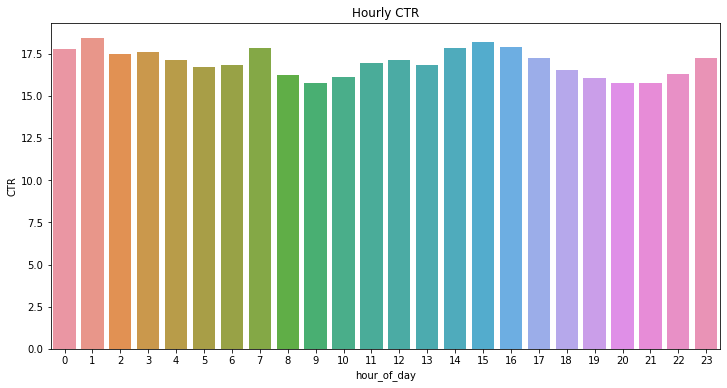

In [20]:
# Hourly CTR

df_click = train[train['click'] == 1]
df_hour = train[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour)
plt.title('Hourly CTR');

Text(0.5, 1.0, 'click trends by day of week')

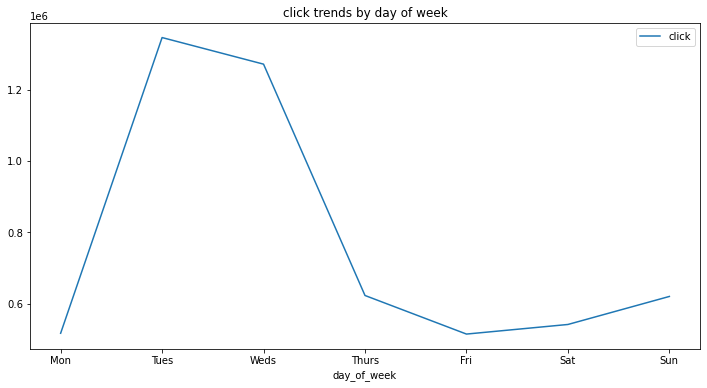

In [23]:
# Day of week

train['day_of_week'] = train['hour'].apply(lambda val: val.day_name())
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week')

Text(0.5, 1.0, 'Impressions vs. clicks by day of week')

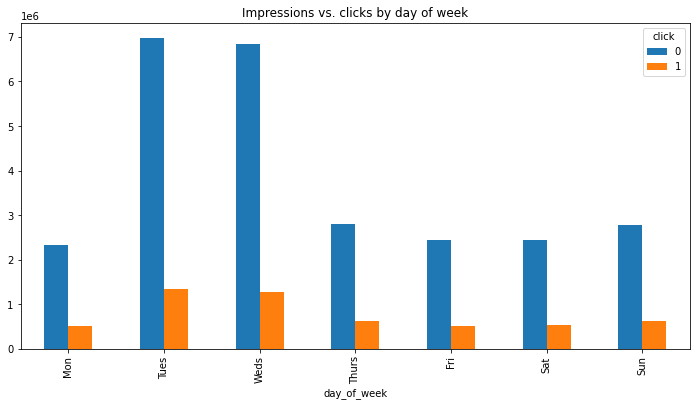

In [24]:
# Impressions vs clicks by day of week

train.groupby(['day_of_week','click']).size().unstack().reindex(cats).plot(kind='bar', title="Day of the Week", figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week')

In [25]:
# Day of week CTR

Text(0.5, 1.0, 'Day of week CTR')

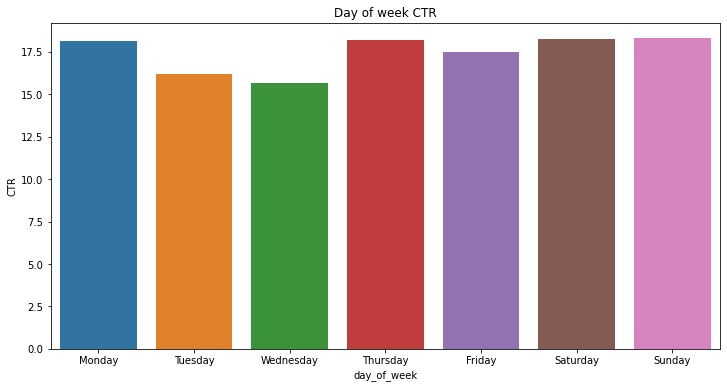

In [26]:
df_click = train[train['click'] == 1]
df_dayofweek = train[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR')

In [27]:
# C1 feature
# value = 1005 has almost 92% of the data 

print(train.C1.value_counts() / len(train))

1005    0.915982
1002    0.056194
1010    0.023654
1012    0.002849
1007    0.000910
1001    0.000254
1008    0.000157
Name: C1, dtype: float64


In [30]:
# CTR by C1 value

C1_values = train.C1.unique()
C1_values.sort()
ctr_avg_list=[]
for i in C1_values:
    ctr_avg=train.loc[np.where(train.C1 == i)].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.033862824775273984
for C1 value: 1002,  click through rate: 0.20936383818684176
for C1 value: 1005,  click through rate: 0.1696447026834317
for C1 value: 1007,  click through rate: 0.0404286744753203
for C1 value: 1008,  click through rate: 0.12025442258000398
for C1 value: 1010,  click through rate: 0.0937362892952103
for C1 value: 1012,  click through rate: 0.15876603073952586


<AxesSubplot:title={'center':'C1 histogram'}, xlabel='C1'>

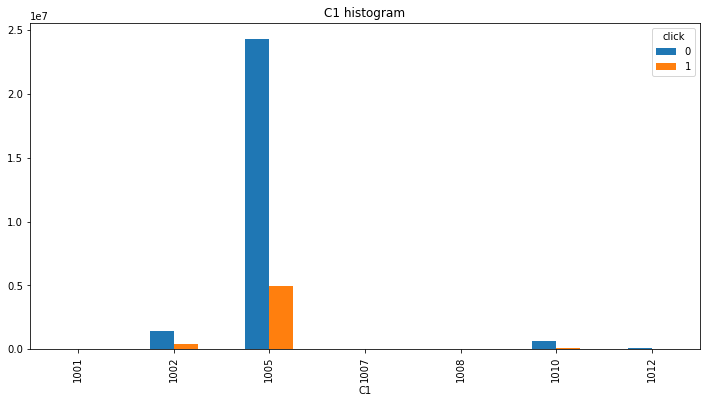

In [31]:
# CTR by C1 value - histogram

train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 histogram')

Text(0.5, 1.0, 'CTR by C1')

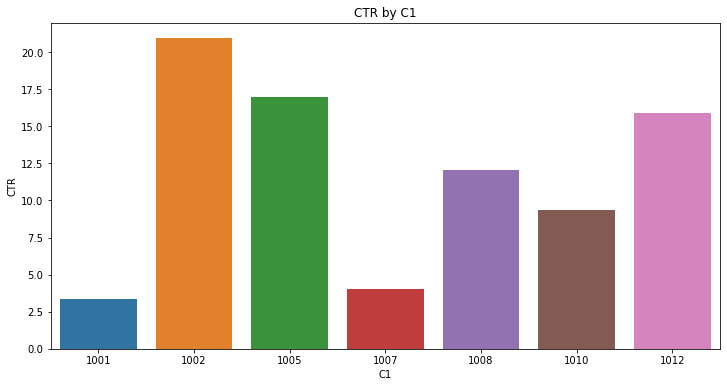

In [32]:
df_c1 = train[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click': 'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C1', data=df_c1)
plt.title('CTR by C1')

In [33]:
# Banner
print(train.banner_pos.value_counts()/len(train))

0    0.714311
1    0.283858
7    0.001110
2    0.000319
4    0.000192
5    0.000157
3    0.000052
Name: banner_pos, dtype: float64


In [35]:
# CTR by Banner

banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=train.loc[np.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.16479959033051175
for banner position: 1,  click through rate: 0.1821743729659288
for banner position: 2,  click through rate: 0.11819960861056751
for banner position: 3,  click through rate: 0.1880597014925373
for banner position: 4,  click through rate: 0.18499184339314845
for banner position: 5,  click through rate: 0.12019900497512438
for banner position: 7,  click through rate: 0.3229266370136817


<AxesSubplot:title={'center':'Banner position histogram'}, xlabel='banner_pos'>

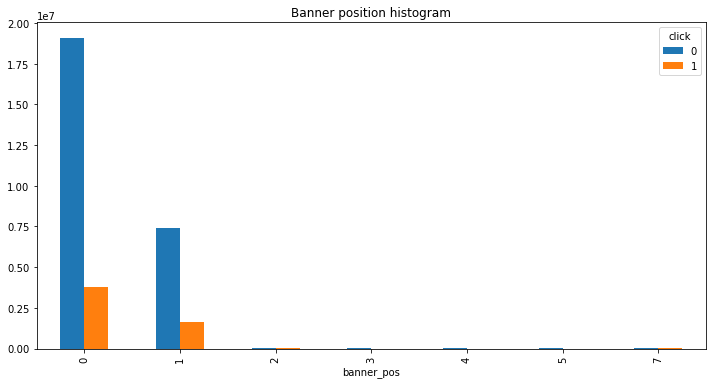

In [36]:
# Banner position histogram

train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Banner position histogram')

Text(0.5, 1.0, 'CTR by banner position')

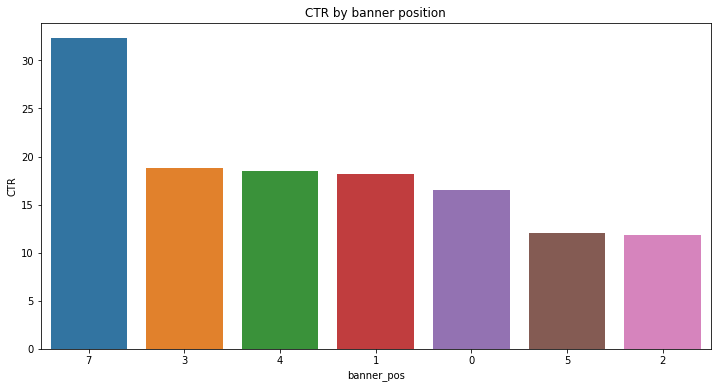

In [37]:
# CTR by Banner position

df_banner = train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position')

In [38]:
# Device type

print('The impressions by device types')
print((train.device_type.value_counts()/len(train)))

The impressions by device types
1    9.201515e-01
0    5.619387e-02
4    2.029196e-02
5    3.361749e-03
2    9.065024e-07
Name: device_type, dtype: float64


<AxesSubplot:title={'center':'Device types'}, xlabel='device_type'>

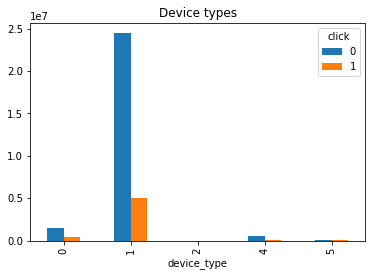

In [39]:
# Device type vs clicks
train[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='Device types')

<AxesSubplot:title={'center':'Clicks from device type 1 by hour of day'}, xlabel='hour_of_day'>

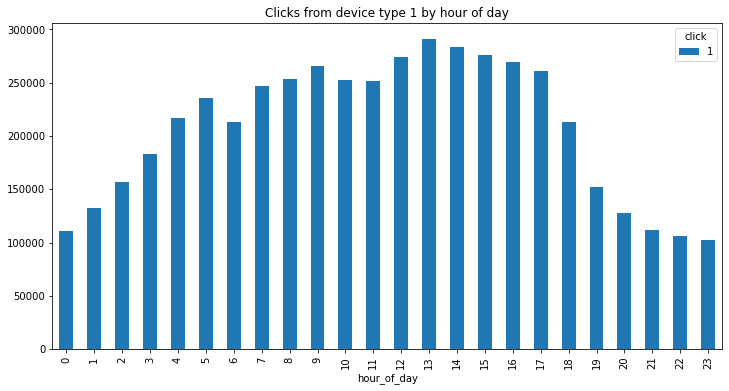

In [40]:
# Most clicks happened during the business hours from device type 1

df_click[df_click['device_type']==1].groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6))

In [41]:
# highest CTR comes from device type 0

device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = train.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100

merged_device_type

,device_type,click,impressions,CTR
0,0,376374,1797703,20.936384
1,1,4987670,29436650,16.943742
2,2,2,29,6.896552
3,4,60961,649162,9.390722
4,5,9970,107546,9.270452


In [42]:
# Hash function

def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
train = convert_obj_to_int(train)

In [43]:
train.dtypes

id                          float64
click                         int64
hour                 datetime64[ns]
C1                            int64
banner_pos                    int64
device_type                   int64
device_conn_type              int64
C14                           int64
C15                           int64
C16                           int64
C17                           int64
C18                           int64
C19                           int64
C20                           int64
C21                           int64
hour_of_day                   int64
site_id_int                   int64
site_domain_int               int64
site_category_int             int64
app_id_int                    int64
app_domain_int                int64
app_category_int              int64
device_id_int                 int64
device_ip_int                 int64
device_model_int              int64
day_of_week_int               int64
dtype: object

# LightGBM Model

In [46]:
import lightgbm as lgb

features = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int', 'day_of_week_int']

X_train = train.loc[:, features]

y_target = train.click.values

#create lightgbm dataset
msk = np.random.rand(len(X_train)) < 0.8
lgb_train = lgb.Dataset(X_train[msk], y_target[msk])
lgb_eval = lgb.Dataset(X_train[~msk], y_target[~msk], reference=lgb_train)

# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'binary_logloss'},
    'num_leaves': 31, # default leaves(31) amount for each tree
    'learning_rate': 0.08,
    'feature_fraction': 0.7, # will select 70% features before training each tree
    'bagging_fraction': 0.3, #feature_fraction, but this will random select part of data
    'bagging_freq': 5, #  perform bagging at every 5 iteration
    'verbose': 0
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=8000,
                valid_sets=lgb_eval,
                early_stopping_rounds=1500)

Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.618361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's binary_logloss: 0.450901
Training until validation scores don't improve for 1500 rounds
[2]	valid_0's binary_logloss: 0.446415
[3]	valid_0's binary_logloss: 0.442576
[4]	valid_0's binary_logloss: 0.439527
[5]	valid_0's binary_logloss: 0.436649
[6]	valid_0's binary_logloss: 0.434077
[7]	valid_0's binary_logloss: 0.431984
[8]	valid_0's binary_logloss: 0.430059
[9]	valid_0's binary_logloss: 0.428201
[10]	valid_0's binary_logloss: 0.426687
[11]	valid_0's binary_logloss: 0.425419
[12]	valid_0's binary_logloss: 0.424187
[13]	valid_0's binary_logloss: 0.423046
[14]	valid_0's binary_logloss: 0.421999
[15]	valid_0's binary_logloss: 0.421091
[16]	valid_0's binary_logloss: 0.420245
[17]	valid_0's binary_logloss: 0.419419
[18]	valid_0's bina

[197]	valid_0's binary_logloss: 0.401249
[198]	valid_0's binary_logloss: 0.401218
[199]	valid_0's binary_logloss: 0.401191
[200]	valid_0's binary_logloss: 0.401179
[201]	valid_0's binary_logloss: 0.401156
[202]	valid_0's binary_logloss: 0.401137
[203]	valid_0's binary_logloss: 0.401105
[204]	valid_0's binary_logloss: 0.401086
[205]	valid_0's binary_logloss: 0.401058
[206]	valid_0's binary_logloss: 0.40102
[207]	valid_0's binary_logloss: 0.400988
[208]	valid_0's binary_logloss: 0.400964
[209]	valid_0's binary_logloss: 0.400945
[210]	valid_0's binary_logloss: 0.400911
[211]	valid_0's binary_logloss: 0.400891
[212]	valid_0's binary_logloss: 0.400874
[213]	valid_0's binary_logloss: 0.400854
[214]	valid_0's binary_logloss: 0.400831
[215]	valid_0's binary_logloss: 0.400807
[216]	valid_0's binary_logloss: 0.400783
[217]	valid_0's binary_logloss: 0.400759
[218]	valid_0's binary_logloss: 0.400738
[219]	valid_0's binary_logloss: 0.400714
[220]	valid_0's binary_logloss: 0.400693
[221]	valid_0's b

[398]	valid_0's binary_logloss: 0.398109
[399]	valid_0's binary_logloss: 0.398104
[400]	valid_0's binary_logloss: 0.398097
[401]	valid_0's binary_logloss: 0.398093
[402]	valid_0's binary_logloss: 0.39809
[403]	valid_0's binary_logloss: 0.398074
[404]	valid_0's binary_logloss: 0.39807
[405]	valid_0's binary_logloss: 0.398064
[406]	valid_0's binary_logloss: 0.398059
[407]	valid_0's binary_logloss: 0.398055
[408]	valid_0's binary_logloss: 0.39805
[409]	valid_0's binary_logloss: 0.398044
[410]	valid_0's binary_logloss: 0.39804
[411]	valid_0's binary_logloss: 0.398028
[412]	valid_0's binary_logloss: 0.39801
[413]	valid_0's binary_logloss: 0.398002
[414]	valid_0's binary_logloss: 0.39799
[415]	valid_0's binary_logloss: 0.39798
[416]	valid_0's binary_logloss: 0.397973
[417]	valid_0's binary_logloss: 0.39796
[418]	valid_0's binary_logloss: 0.39795
[419]	valid_0's binary_logloss: 0.397942
[420]	valid_0's binary_logloss: 0.397928
[421]	valid_0's binary_logloss: 0.397916
[422]	valid_0's binary_lo

[599]	valid_0's binary_logloss: 0.396518
[600]	valid_0's binary_logloss: 0.396516
[601]	valid_0's binary_logloss: 0.39651
[602]	valid_0's binary_logloss: 0.396503
[603]	valid_0's binary_logloss: 0.396495
[604]	valid_0's binary_logloss: 0.396482
[605]	valid_0's binary_logloss: 0.396479
[606]	valid_0's binary_logloss: 0.396468
[607]	valid_0's binary_logloss: 0.396462
[608]	valid_0's binary_logloss: 0.396457
[609]	valid_0's binary_logloss: 0.396448
[610]	valid_0's binary_logloss: 0.396446
[611]	valid_0's binary_logloss: 0.396444
[612]	valid_0's binary_logloss: 0.396443
[613]	valid_0's binary_logloss: 0.396442
[614]	valid_0's binary_logloss: 0.396434
[615]	valid_0's binary_logloss: 0.396431
[616]	valid_0's binary_logloss: 0.396426
[617]	valid_0's binary_logloss: 0.396419
[618]	valid_0's binary_logloss: 0.396414
[619]	valid_0's binary_logloss: 0.396409
[620]	valid_0's binary_logloss: 0.396405
[621]	valid_0's binary_logloss: 0.3964
[622]	valid_0's binary_logloss: 0.396399
[623]	valid_0's bin

[800]	valid_0's binary_logloss: 0.395445
[801]	valid_0's binary_logloss: 0.395444
[802]	valid_0's binary_logloss: 0.395443
[803]	valid_0's binary_logloss: 0.395442
[804]	valid_0's binary_logloss: 0.395439
[805]	valid_0's binary_logloss: 0.395438
[806]	valid_0's binary_logloss: 0.395427
[807]	valid_0's binary_logloss: 0.395422
[808]	valid_0's binary_logloss: 0.39542
[809]	valid_0's binary_logloss: 0.395413
[810]	valid_0's binary_logloss: 0.395411
[811]	valid_0's binary_logloss: 0.39541
[812]	valid_0's binary_logloss: 0.395406
[813]	valid_0's binary_logloss: 0.3954
[814]	valid_0's binary_logloss: 0.395396
[815]	valid_0's binary_logloss: 0.39539
[816]	valid_0's binary_logloss: 0.395387
[817]	valid_0's binary_logloss: 0.395386
[818]	valid_0's binary_logloss: 0.395385
[819]	valid_0's binary_logloss: 0.395382
[820]	valid_0's binary_logloss: 0.395378
[821]	valid_0's binary_logloss: 0.395375
[822]	valid_0's binary_logloss: 0.395372
[823]	valid_0's binary_logloss: 0.395369
[824]	valid_0's binar

[1001]	valid_0's binary_logloss: 0.39467
[1002]	valid_0's binary_logloss: 0.394668
[1003]	valid_0's binary_logloss: 0.394668
[1004]	valid_0's binary_logloss: 0.394666
[1005]	valid_0's binary_logloss: 0.394661
[1006]	valid_0's binary_logloss: 0.394656
[1007]	valid_0's binary_logloss: 0.394651
[1008]	valid_0's binary_logloss: 0.39465
[1009]	valid_0's binary_logloss: 0.394645
[1010]	valid_0's binary_logloss: 0.39464
[1011]	valid_0's binary_logloss: 0.394634
[1012]	valid_0's binary_logloss: 0.394631
[1013]	valid_0's binary_logloss: 0.394627
[1014]	valid_0's binary_logloss: 0.394622
[1015]	valid_0's binary_logloss: 0.394621
[1016]	valid_0's binary_logloss: 0.394618
[1017]	valid_0's binary_logloss: 0.394612
[1018]	valid_0's binary_logloss: 0.39461
[1019]	valid_0's binary_logloss: 0.394605
[1020]	valid_0's binary_logloss: 0.394602
[1021]	valid_0's binary_logloss: 0.394601
[1022]	valid_0's binary_logloss: 0.394597
[1023]	valid_0's binary_logloss: 0.394596
[1024]	valid_0's binary_logloss: 0.394

[1197]	valid_0's binary_logloss: 0.394158
[1198]	valid_0's binary_logloss: 0.394156
[1199]	valid_0's binary_logloss: 0.394154
[1200]	valid_0's binary_logloss: 0.394153
[1201]	valid_0's binary_logloss: 0.394152
[1202]	valid_0's binary_logloss: 0.394149
[1203]	valid_0's binary_logloss: 0.394145
[1204]	valid_0's binary_logloss: 0.394141
[1205]	valid_0's binary_logloss: 0.39414
[1206]	valid_0's binary_logloss: 0.394138
[1207]	valid_0's binary_logloss: 0.394136
[1208]	valid_0's binary_logloss: 0.394134
[1209]	valid_0's binary_logloss: 0.394134
[1210]	valid_0's binary_logloss: 0.394132
[1211]	valid_0's binary_logloss: 0.394129
[1212]	valid_0's binary_logloss: 0.394126
[1213]	valid_0's binary_logloss: 0.394125
[1214]	valid_0's binary_logloss: 0.394123
[1215]	valid_0's binary_logloss: 0.39412
[1216]	valid_0's binary_logloss: 0.394118
[1217]	valid_0's binary_logloss: 0.394117
[1218]	valid_0's binary_logloss: 0.394116
[1219]	valid_0's binary_logloss: 0.394113
[1220]	valid_0's binary_logloss: 0.3

[1393]	valid_0's binary_logloss: 0.393779
[1394]	valid_0's binary_logloss: 0.393778
[1395]	valid_0's binary_logloss: 0.393778
[1396]	valid_0's binary_logloss: 0.393777
[1397]	valid_0's binary_logloss: 0.393775
[1398]	valid_0's binary_logloss: 0.393775
[1399]	valid_0's binary_logloss: 0.393772
[1400]	valid_0's binary_logloss: 0.393772
[1401]	valid_0's binary_logloss: 0.393766
[1402]	valid_0's binary_logloss: 0.393761
[1403]	valid_0's binary_logloss: 0.393757
[1404]	valid_0's binary_logloss: 0.393757
[1405]	valid_0's binary_logloss: 0.39375
[1406]	valid_0's binary_logloss: 0.393749
[1407]	valid_0's binary_logloss: 0.393747
[1408]	valid_0's binary_logloss: 0.393744
[1409]	valid_0's binary_logloss: 0.393744
[1410]	valid_0's binary_logloss: 0.393743
[1411]	valid_0's binary_logloss: 0.393743
[1412]	valid_0's binary_logloss: 0.39374
[1413]	valid_0's binary_logloss: 0.393736
[1414]	valid_0's binary_logloss: 0.393733
[1415]	valid_0's binary_logloss: 0.393733
[1416]	valid_0's binary_logloss: 0.3

[1589]	valid_0's binary_logloss: 0.393391
[1590]	valid_0's binary_logloss: 0.393387
[1591]	valid_0's binary_logloss: 0.393381
[1592]	valid_0's binary_logloss: 0.393381
[1593]	valid_0's binary_logloss: 0.393379
[1594]	valid_0's binary_logloss: 0.393374
[1595]	valid_0's binary_logloss: 0.393371
[1596]	valid_0's binary_logloss: 0.393368
[1597]	valid_0's binary_logloss: 0.393367
[1598]	valid_0's binary_logloss: 0.393363
[1599]	valid_0's binary_logloss: 0.39336
[1600]	valid_0's binary_logloss: 0.393359
[1601]	valid_0's binary_logloss: 0.393359
[1602]	valid_0's binary_logloss: 0.393358
[1603]	valid_0's binary_logloss: 0.393357
[1604]	valid_0's binary_logloss: 0.393354
[1605]	valid_0's binary_logloss: 0.393352
[1606]	valid_0's binary_logloss: 0.39335
[1607]	valid_0's binary_logloss: 0.393349
[1608]	valid_0's binary_logloss: 0.393347
[1609]	valid_0's binary_logloss: 0.393346
[1610]	valid_0's binary_logloss: 0.393342
[1611]	valid_0's binary_logloss: 0.39334
[1612]	valid_0's binary_logloss: 0.39

[1785]	valid_0's binary_logloss: 0.393075
[1786]	valid_0's binary_logloss: 0.393073
[1787]	valid_0's binary_logloss: 0.393072
[1788]	valid_0's binary_logloss: 0.393071
[1789]	valid_0's binary_logloss: 0.393068
[1790]	valid_0's binary_logloss: 0.393066
[1791]	valid_0's binary_logloss: 0.393064
[1792]	valid_0's binary_logloss: 0.393063
[1793]	valid_0's binary_logloss: 0.393062
[1794]	valid_0's binary_logloss: 0.393061
[1795]	valid_0's binary_logloss: 0.39306
[1796]	valid_0's binary_logloss: 0.393059
[1797]	valid_0's binary_logloss: 0.393059
[1798]	valid_0's binary_logloss: 0.393059
[1799]	valid_0's binary_logloss: 0.393058
[1800]	valid_0's binary_logloss: 0.393057
[1801]	valid_0's binary_logloss: 0.393053
[1802]	valid_0's binary_logloss: 0.393052
[1803]	valid_0's binary_logloss: 0.393051
[1804]	valid_0's binary_logloss: 0.393049
[1805]	valid_0's binary_logloss: 0.393048
[1806]	valid_0's binary_logloss: 0.393046
[1807]	valid_0's binary_logloss: 0.393044
[1808]	valid_0's binary_logloss: 0.

[1981]	valid_0's binary_logloss: 0.392825
[1982]	valid_0's binary_logloss: 0.392824
[1983]	valid_0's binary_logloss: 0.392821
[1984]	valid_0's binary_logloss: 0.39282
[1985]	valid_0's binary_logloss: 0.392819
[1986]	valid_0's binary_logloss: 0.392817
[1987]	valid_0's binary_logloss: 0.392816
[1988]	valid_0's binary_logloss: 0.392815
[1989]	valid_0's binary_logloss: 0.392812
[1990]	valid_0's binary_logloss: 0.392811
[1991]	valid_0's binary_logloss: 0.392809
[1992]	valid_0's binary_logloss: 0.392809
[1993]	valid_0's binary_logloss: 0.392808
[1994]	valid_0's binary_logloss: 0.392806
[1995]	valid_0's binary_logloss: 0.392806
[1996]	valid_0's binary_logloss: 0.392804
[1997]	valid_0's binary_logloss: 0.392804
[1998]	valid_0's binary_logloss: 0.392801
[1999]	valid_0's binary_logloss: 0.3928
[2000]	valid_0's binary_logloss: 0.392799
[2001]	valid_0's binary_logloss: 0.392799
[2002]	valid_0's binary_logloss: 0.392798
[2003]	valid_0's binary_logloss: 0.392798
[2004]	valid_0's binary_logloss: 0.39

[2177]	valid_0's binary_logloss: 0.392605
[2178]	valid_0's binary_logloss: 0.392603
[2179]	valid_0's binary_logloss: 0.392601
[2180]	valid_0's binary_logloss: 0.392598
[2181]	valid_0's binary_logloss: 0.392597
[2182]	valid_0's binary_logloss: 0.392595
[2183]	valid_0's binary_logloss: 0.392594
[2184]	valid_0's binary_logloss: 0.392593
[2185]	valid_0's binary_logloss: 0.392592
[2186]	valid_0's binary_logloss: 0.392591
[2187]	valid_0's binary_logloss: 0.392589
[2188]	valid_0's binary_logloss: 0.392588
[2189]	valid_0's binary_logloss: 0.392587
[2190]	valid_0's binary_logloss: 0.392587
[2191]	valid_0's binary_logloss: 0.392584
[2192]	valid_0's binary_logloss: 0.392583
[2193]	valid_0's binary_logloss: 0.392583
[2194]	valid_0's binary_logloss: 0.392583
[2195]	valid_0's binary_logloss: 0.392582
[2196]	valid_0's binary_logloss: 0.392577
[2197]	valid_0's binary_logloss: 0.392573
[2198]	valid_0's binary_logloss: 0.392569
[2199]	valid_0's binary_logloss: 0.392566
[2200]	valid_0's binary_logloss: 0

[2373]	valid_0's binary_logloss: 0.392366
[2374]	valid_0's binary_logloss: 0.392364
[2375]	valid_0's binary_logloss: 0.392363
[2376]	valid_0's binary_logloss: 0.392361
[2377]	valid_0's binary_logloss: 0.392359
[2378]	valid_0's binary_logloss: 0.392358
[2379]	valid_0's binary_logloss: 0.392357
[2380]	valid_0's binary_logloss: 0.392354
[2381]	valid_0's binary_logloss: 0.392353
[2382]	valid_0's binary_logloss: 0.392353
[2383]	valid_0's binary_logloss: 0.392353
[2384]	valid_0's binary_logloss: 0.392352
[2385]	valid_0's binary_logloss: 0.392351
[2386]	valid_0's binary_logloss: 0.392351
[2387]	valid_0's binary_logloss: 0.39235
[2388]	valid_0's binary_logloss: 0.39235
[2389]	valid_0's binary_logloss: 0.39235
[2390]	valid_0's binary_logloss: 0.392349
[2391]	valid_0's binary_logloss: 0.392348
[2392]	valid_0's binary_logloss: 0.392348
[2393]	valid_0's binary_logloss: 0.392347
[2394]	valid_0's binary_logloss: 0.392345
[2395]	valid_0's binary_logloss: 0.392344
[2396]	valid_0's binary_logloss: 0.39

[2569]	valid_0's binary_logloss: 0.392172
[2570]	valid_0's binary_logloss: 0.392172
[2571]	valid_0's binary_logloss: 0.392171
[2572]	valid_0's binary_logloss: 0.39217
[2573]	valid_0's binary_logloss: 0.392169
[2574]	valid_0's binary_logloss: 0.392167
[2575]	valid_0's binary_logloss: 0.392166
[2576]	valid_0's binary_logloss: 0.392166
[2577]	valid_0's binary_logloss: 0.392166
[2578]	valid_0's binary_logloss: 0.392165
[2579]	valid_0's binary_logloss: 0.392165
[2580]	valid_0's binary_logloss: 0.392164
[2581]	valid_0's binary_logloss: 0.392163
[2582]	valid_0's binary_logloss: 0.392163
[2583]	valid_0's binary_logloss: 0.392162
[2584]	valid_0's binary_logloss: 0.39216
[2585]	valid_0's binary_logloss: 0.392159
[2586]	valid_0's binary_logloss: 0.392159
[2587]	valid_0's binary_logloss: 0.392158
[2588]	valid_0's binary_logloss: 0.392157
[2589]	valid_0's binary_logloss: 0.392157
[2590]	valid_0's binary_logloss: 0.392156
[2591]	valid_0's binary_logloss: 0.392156
[2592]	valid_0's binary_logloss: 0.3

[2765]	valid_0's binary_logloss: 0.392017
[2766]	valid_0's binary_logloss: 0.392013
[2767]	valid_0's binary_logloss: 0.39201
[2768]	valid_0's binary_logloss: 0.392009
[2769]	valid_0's binary_logloss: 0.392008
[2770]	valid_0's binary_logloss: 0.392005
[2771]	valid_0's binary_logloss: 0.392003
[2772]	valid_0's binary_logloss: 0.392003
[2773]	valid_0's binary_logloss: 0.392002
[2774]	valid_0's binary_logloss: 0.392002
[2775]	valid_0's binary_logloss: 0.392001
[2776]	valid_0's binary_logloss: 0.392001
[2777]	valid_0's binary_logloss: 0.391999
[2778]	valid_0's binary_logloss: 0.391997
[2779]	valid_0's binary_logloss: 0.391997
[2780]	valid_0's binary_logloss: 0.391995
[2781]	valid_0's binary_logloss: 0.391994
[2782]	valid_0's binary_logloss: 0.391994
[2783]	valid_0's binary_logloss: 0.391994
[2784]	valid_0's binary_logloss: 0.391993
[2785]	valid_0's binary_logloss: 0.391992
[2786]	valid_0's binary_logloss: 0.391992
[2787]	valid_0's binary_logloss: 0.391991
[2788]	valid_0's binary_logloss: 0.

[2961]	valid_0's binary_logloss: 0.391856
[2962]	valid_0's binary_logloss: 0.391855
[2963]	valid_0's binary_logloss: 0.391854
[2964]	valid_0's binary_logloss: 0.391853
[2965]	valid_0's binary_logloss: 0.391853
[2966]	valid_0's binary_logloss: 0.391853
[2967]	valid_0's binary_logloss: 0.39185
[2968]	valid_0's binary_logloss: 0.39185
[2969]	valid_0's binary_logloss: 0.39185
[2970]	valid_0's binary_logloss: 0.39185
[2971]	valid_0's binary_logloss: 0.391846
[2972]	valid_0's binary_logloss: 0.391844
[2973]	valid_0's binary_logloss: 0.391843
[2974]	valid_0's binary_logloss: 0.391841
[2975]	valid_0's binary_logloss: 0.391839
[2976]	valid_0's binary_logloss: 0.391839
[2977]	valid_0's binary_logloss: 0.391839
[2978]	valid_0's binary_logloss: 0.391838
[2979]	valid_0's binary_logloss: 0.391838
[2980]	valid_0's binary_logloss: 0.391837
[2981]	valid_0's binary_logloss: 0.391836
[2982]	valid_0's binary_logloss: 0.391835
[2983]	valid_0's binary_logloss: 0.391835
[2984]	valid_0's binary_logloss: 0.391

[3157]	valid_0's binary_logloss: 0.391715
[3158]	valid_0's binary_logloss: 0.391714
[3159]	valid_0's binary_logloss: 0.391713
[3160]	valid_0's binary_logloss: 0.391713
[3161]	valid_0's binary_logloss: 0.39171
[3162]	valid_0's binary_logloss: 0.391709
[3163]	valid_0's binary_logloss: 0.391708
[3164]	valid_0's binary_logloss: 0.391708
[3165]	valid_0's binary_logloss: 0.391707
[3166]	valid_0's binary_logloss: 0.391707
[3167]	valid_0's binary_logloss: 0.391705
[3168]	valid_0's binary_logloss: 0.391703
[3169]	valid_0's binary_logloss: 0.3917
[3170]	valid_0's binary_logloss: 0.391698
[3171]	valid_0's binary_logloss: 0.391698
[3172]	valid_0's binary_logloss: 0.391697
[3173]	valid_0's binary_logloss: 0.391697
[3174]	valid_0's binary_logloss: 0.391696
[3175]	valid_0's binary_logloss: 0.391696
[3176]	valid_0's binary_logloss: 0.391695
[3177]	valid_0's binary_logloss: 0.391694
[3178]	valid_0's binary_logloss: 0.391694
[3179]	valid_0's binary_logloss: 0.391694
[3180]	valid_0's binary_logloss: 0.39

[3354]	valid_0's binary_logloss: 0.391588
[3355]	valid_0's binary_logloss: 0.391588
[3356]	valid_0's binary_logloss: 0.391587
[3357]	valid_0's binary_logloss: 0.391586
[3358]	valid_0's binary_logloss: 0.391586
[3359]	valid_0's binary_logloss: 0.391585
[3360]	valid_0's binary_logloss: 0.391584
[3361]	valid_0's binary_logloss: 0.391584
[3362]	valid_0's binary_logloss: 0.391583
[3363]	valid_0's binary_logloss: 0.391583
[3364]	valid_0's binary_logloss: 0.391583
[3365]	valid_0's binary_logloss: 0.391583
[3366]	valid_0's binary_logloss: 0.391583
[3367]	valid_0's binary_logloss: 0.391582
[3368]	valid_0's binary_logloss: 0.391582
[3369]	valid_0's binary_logloss: 0.391581
[3370]	valid_0's binary_logloss: 0.39158
[3371]	valid_0's binary_logloss: 0.391578
[3372]	valid_0's binary_logloss: 0.391578
[3373]	valid_0's binary_logloss: 0.391577
[3374]	valid_0's binary_logloss: 0.391577
[3375]	valid_0's binary_logloss: 0.391575
[3376]	valid_0's binary_logloss: 0.391575
[3377]	valid_0's binary_logloss: 0.

[3550]	valid_0's binary_logloss: 0.39148
[3551]	valid_0's binary_logloss: 0.39148
[3552]	valid_0's binary_logloss: 0.39148
[3553]	valid_0's binary_logloss: 0.391478
[3554]	valid_0's binary_logloss: 0.391477
[3555]	valid_0's binary_logloss: 0.391476
[3556]	valid_0's binary_logloss: 0.391476
[3557]	valid_0's binary_logloss: 0.391474
[3558]	valid_0's binary_logloss: 0.391474
[3559]	valid_0's binary_logloss: 0.391472
[3560]	valid_0's binary_logloss: 0.391471
[3561]	valid_0's binary_logloss: 0.391471
[3562]	valid_0's binary_logloss: 0.391471
[3563]	valid_0's binary_logloss: 0.391471
[3564]	valid_0's binary_logloss: 0.39147
[3565]	valid_0's binary_logloss: 0.39147
[3566]	valid_0's binary_logloss: 0.39147
[3567]	valid_0's binary_logloss: 0.39147
[3568]	valid_0's binary_logloss: 0.39147
[3569]	valid_0's binary_logloss: 0.391468
[3570]	valid_0's binary_logloss: 0.391468
[3571]	valid_0's binary_logloss: 0.391467
[3572]	valid_0's binary_logloss: 0.391466
[3573]	valid_0's binary_logloss: 0.391465


[3746]	valid_0's binary_logloss: 0.391358
[3747]	valid_0's binary_logloss: 0.391358
[3748]	valid_0's binary_logloss: 0.391357
[3749]	valid_0's binary_logloss: 0.391357
[3750]	valid_0's binary_logloss: 0.391356
[3751]	valid_0's binary_logloss: 0.391355
[3752]	valid_0's binary_logloss: 0.391353
[3753]	valid_0's binary_logloss: 0.391353
[3754]	valid_0's binary_logloss: 0.391353
[3755]	valid_0's binary_logloss: 0.391352
[3756]	valid_0's binary_logloss: 0.391351
[3757]	valid_0's binary_logloss: 0.391352
[3758]	valid_0's binary_logloss: 0.391351
[3759]	valid_0's binary_logloss: 0.391351
[3760]	valid_0's binary_logloss: 0.391351
[3761]	valid_0's binary_logloss: 0.391349
[3762]	valid_0's binary_logloss: 0.391349
[3763]	valid_0's binary_logloss: 0.391348
[3764]	valid_0's binary_logloss: 0.391347
[3765]	valid_0's binary_logloss: 0.391346
[3766]	valid_0's binary_logloss: 0.391346
[3767]	valid_0's binary_logloss: 0.391346
[3768]	valid_0's binary_logloss: 0.391346
[3769]	valid_0's binary_logloss: 0

[3942]	valid_0's binary_logloss: 0.39126
[3943]	valid_0's binary_logloss: 0.39126
[3944]	valid_0's binary_logloss: 0.39126
[3945]	valid_0's binary_logloss: 0.391259
[3946]	valid_0's binary_logloss: 0.391259
[3947]	valid_0's binary_logloss: 0.391258
[3948]	valid_0's binary_logloss: 0.391258
[3949]	valid_0's binary_logloss: 0.391258
[3950]	valid_0's binary_logloss: 0.391258
[3951]	valid_0's binary_logloss: 0.391257
[3952]	valid_0's binary_logloss: 0.391257
[3953]	valid_0's binary_logloss: 0.391257
[3954]	valid_0's binary_logloss: 0.391257
[3955]	valid_0's binary_logloss: 0.391255
[3956]	valid_0's binary_logloss: 0.391255
[3957]	valid_0's binary_logloss: 0.391254
[3958]	valid_0's binary_logloss: 0.391254
[3959]	valid_0's binary_logloss: 0.391254
[3960]	valid_0's binary_logloss: 0.391254
[3961]	valid_0's binary_logloss: 0.391253
[3962]	valid_0's binary_logloss: 0.391253
[3963]	valid_0's binary_logloss: 0.391253
[3964]	valid_0's binary_logloss: 0.391252
[3965]	valid_0's binary_logloss: 0.39

[4138]	valid_0's binary_logloss: 0.391163
[4139]	valid_0's binary_logloss: 0.391163
[4140]	valid_0's binary_logloss: 0.391163
[4141]	valid_0's binary_logloss: 0.391163
[4142]	valid_0's binary_logloss: 0.391163
[4143]	valid_0's binary_logloss: 0.391162
[4144]	valid_0's binary_logloss: 0.391162
[4145]	valid_0's binary_logloss: 0.391162
[4146]	valid_0's binary_logloss: 0.391161
[4147]	valid_0's binary_logloss: 0.39116
[4148]	valid_0's binary_logloss: 0.391159
[4149]	valid_0's binary_logloss: 0.391159
[4150]	valid_0's binary_logloss: 0.391159
[4151]	valid_0's binary_logloss: 0.391158
[4152]	valid_0's binary_logloss: 0.391157
[4153]	valid_0's binary_logloss: 0.391157
[4154]	valid_0's binary_logloss: 0.391157
[4155]	valid_0's binary_logloss: 0.391157
[4156]	valid_0's binary_logloss: 0.391156
[4157]	valid_0's binary_logloss: 0.391155
[4158]	valid_0's binary_logloss: 0.391155
[4159]	valid_0's binary_logloss: 0.391155
[4160]	valid_0's binary_logloss: 0.391155
[4161]	valid_0's binary_logloss: 0.

[4334]	valid_0's binary_logloss: 0.391074
[4335]	valid_0's binary_logloss: 0.391074
[4336]	valid_0's binary_logloss: 0.391074
[4337]	valid_0's binary_logloss: 0.391073
[4338]	valid_0's binary_logloss: 0.391072
[4339]	valid_0's binary_logloss: 0.391072
[4340]	valid_0's binary_logloss: 0.391072
[4341]	valid_0's binary_logloss: 0.391072
[4342]	valid_0's binary_logloss: 0.391071
[4343]	valid_0's binary_logloss: 0.391072
[4344]	valid_0's binary_logloss: 0.391072
[4345]	valid_0's binary_logloss: 0.39107
[4346]	valid_0's binary_logloss: 0.39107
[4347]	valid_0's binary_logloss: 0.391069
[4348]	valid_0's binary_logloss: 0.391069
[4349]	valid_0's binary_logloss: 0.391068
[4350]	valid_0's binary_logloss: 0.391068
[4351]	valid_0's binary_logloss: 0.391067
[4352]	valid_0's binary_logloss: 0.391067
[4353]	valid_0's binary_logloss: 0.391066
[4354]	valid_0's binary_logloss: 0.391066
[4355]	valid_0's binary_logloss: 0.391066
[4356]	valid_0's binary_logloss: 0.391065
[4357]	valid_0's binary_logloss: 0.3

[4530]	valid_0's binary_logloss: 0.390978
[4531]	valid_0's binary_logloss: 0.390977
[4532]	valid_0's binary_logloss: 0.390977
[4533]	valid_0's binary_logloss: 0.390976
[4534]	valid_0's binary_logloss: 0.390976
[4535]	valid_0's binary_logloss: 0.390976
[4536]	valid_0's binary_logloss: 0.390975
[4537]	valid_0's binary_logloss: 0.390974
[4538]	valid_0's binary_logloss: 0.390972
[4539]	valid_0's binary_logloss: 0.390972
[4540]	valid_0's binary_logloss: 0.390971
[4541]	valid_0's binary_logloss: 0.390971
[4542]	valid_0's binary_logloss: 0.390971
[4543]	valid_0's binary_logloss: 0.390969
[4544]	valid_0's binary_logloss: 0.390969
[4545]	valid_0's binary_logloss: 0.390969
[4546]	valid_0's binary_logloss: 0.390968
[4547]	valid_0's binary_logloss: 0.390967
[4548]	valid_0's binary_logloss: 0.390967
[4549]	valid_0's binary_logloss: 0.390967
[4550]	valid_0's binary_logloss: 0.390967
[4551]	valid_0's binary_logloss: 0.390966
[4552]	valid_0's binary_logloss: 0.390966
[4553]	valid_0's binary_logloss: 0

[4725]	valid_0's binary_logloss: 0.390897
[4726]	valid_0's binary_logloss: 0.390896
[4727]	valid_0's binary_logloss: 0.390895
[4728]	valid_0's binary_logloss: 0.390895
[4729]	valid_0's binary_logloss: 0.390894
[4730]	valid_0's binary_logloss: 0.390893
[4731]	valid_0's binary_logloss: 0.390893
[4732]	valid_0's binary_logloss: 0.390893
[4733]	valid_0's binary_logloss: 0.390889
[4734]	valid_0's binary_logloss: 0.390889
[4735]	valid_0's binary_logloss: 0.390889
[4736]	valid_0's binary_logloss: 0.390888
[4737]	valid_0's binary_logloss: 0.390888
[4738]	valid_0's binary_logloss: 0.390888
[4739]	valid_0's binary_logloss: 0.390888
[4740]	valid_0's binary_logloss: 0.390888
[4741]	valid_0's binary_logloss: 0.390887
[4742]	valid_0's binary_logloss: 0.390887
[4743]	valid_0's binary_logloss: 0.390886
[4744]	valid_0's binary_logloss: 0.390886
[4745]	valid_0's binary_logloss: 0.390885
[4746]	valid_0's binary_logloss: 0.390885
[4747]	valid_0's binary_logloss: 0.390884
[4748]	valid_0's binary_logloss: 0

[4921]	valid_0's binary_logloss: 0.39081
[4922]	valid_0's binary_logloss: 0.39081
[4923]	valid_0's binary_logloss: 0.39081
[4924]	valid_0's binary_logloss: 0.390809
[4925]	valid_0's binary_logloss: 0.390809
[4926]	valid_0's binary_logloss: 0.390809
[4927]	valid_0's binary_logloss: 0.390808
[4928]	valid_0's binary_logloss: 0.390808
[4929]	valid_0's binary_logloss: 0.390807
[4930]	valid_0's binary_logloss: 0.390806
[4931]	valid_0's binary_logloss: 0.390806
[4932]	valid_0's binary_logloss: 0.390806
[4933]	valid_0's binary_logloss: 0.390806
[4934]	valid_0's binary_logloss: 0.390806
[4935]	valid_0's binary_logloss: 0.390806
[4936]	valid_0's binary_logloss: 0.390806
[4937]	valid_0's binary_logloss: 0.390805
[4938]	valid_0's binary_logloss: 0.390805
[4939]	valid_0's binary_logloss: 0.390805
[4940]	valid_0's binary_logloss: 0.390805
[4941]	valid_0's binary_logloss: 0.390805
[4942]	valid_0's binary_logloss: 0.390804
[4943]	valid_0's binary_logloss: 0.390804
[4944]	valid_0's binary_logloss: 0.39

[5117]	valid_0's binary_logloss: 0.390735
[5118]	valid_0's binary_logloss: 0.390735
[5119]	valid_0's binary_logloss: 0.390735
[5120]	valid_0's binary_logloss: 0.390734
[5121]	valid_0's binary_logloss: 0.390734
[5122]	valid_0's binary_logloss: 0.390734
[5123]	valid_0's binary_logloss: 0.390733
[5124]	valid_0's binary_logloss: 0.390733
[5125]	valid_0's binary_logloss: 0.390732
[5126]	valid_0's binary_logloss: 0.390732
[5127]	valid_0's binary_logloss: 0.390731
[5128]	valid_0's binary_logloss: 0.390731
[5129]	valid_0's binary_logloss: 0.390731
[5130]	valid_0's binary_logloss: 0.39073
[5131]	valid_0's binary_logloss: 0.390729
[5132]	valid_0's binary_logloss: 0.390729
[5133]	valid_0's binary_logloss: 0.390729
[5134]	valid_0's binary_logloss: 0.390728
[5135]	valid_0's binary_logloss: 0.390728
[5136]	valid_0's binary_logloss: 0.390728
[5137]	valid_0's binary_logloss: 0.390728
[5138]	valid_0's binary_logloss: 0.390728
[5139]	valid_0's binary_logloss: 0.390728
[5140]	valid_0's binary_logloss: 0.

[5312]	valid_0's binary_logloss: 0.390661
[5313]	valid_0's binary_logloss: 0.390661
[5314]	valid_0's binary_logloss: 0.39066
[5315]	valid_0's binary_logloss: 0.39066
[5316]	valid_0's binary_logloss: 0.39066
[5317]	valid_0's binary_logloss: 0.390659
[5318]	valid_0's binary_logloss: 0.390659
[5319]	valid_0's binary_logloss: 0.390659
[5320]	valid_0's binary_logloss: 0.390659
[5321]	valid_0's binary_logloss: 0.390659
[5322]	valid_0's binary_logloss: 0.390658
[5323]	valid_0's binary_logloss: 0.390658
[5324]	valid_0's binary_logloss: 0.390658
[5325]	valid_0's binary_logloss: 0.390658
[5326]	valid_0's binary_logloss: 0.390657
[5327]	valid_0's binary_logloss: 0.390656
[5328]	valid_0's binary_logloss: 0.390656
[5329]	valid_0's binary_logloss: 0.390657
[5330]	valid_0's binary_logloss: 0.390656
[5331]	valid_0's binary_logloss: 0.390655
[5332]	valid_0's binary_logloss: 0.390655
[5333]	valid_0's binary_logloss: 0.390655
[5334]	valid_0's binary_logloss: 0.390655
[5335]	valid_0's binary_logloss: 0.39

[5508]	valid_0's binary_logloss: 0.390596
[5509]	valid_0's binary_logloss: 0.390595
[5510]	valid_0's binary_logloss: 0.390595
[5511]	valid_0's binary_logloss: 0.390595
[5512]	valid_0's binary_logloss: 0.390594
[5513]	valid_0's binary_logloss: 0.390594
[5514]	valid_0's binary_logloss: 0.390593
[5515]	valid_0's binary_logloss: 0.390593
[5516]	valid_0's binary_logloss: 0.390592
[5517]	valid_0's binary_logloss: 0.390592
[5518]	valid_0's binary_logloss: 0.390592
[5519]	valid_0's binary_logloss: 0.390591
[5520]	valid_0's binary_logloss: 0.390591
[5521]	valid_0's binary_logloss: 0.390591
[5522]	valid_0's binary_logloss: 0.39059
[5523]	valid_0's binary_logloss: 0.39059
[5524]	valid_0's binary_logloss: 0.390589
[5525]	valid_0's binary_logloss: 0.390589
[5526]	valid_0's binary_logloss: 0.390588
[5527]	valid_0's binary_logloss: 0.390588
[5528]	valid_0's binary_logloss: 0.390588
[5529]	valid_0's binary_logloss: 0.390588
[5530]	valid_0's binary_logloss: 0.390588
[5531]	valid_0's binary_logloss: 0.3

[5704]	valid_0's binary_logloss: 0.390526
[5705]	valid_0's binary_logloss: 0.390526
[5706]	valid_0's binary_logloss: 0.390525
[5707]	valid_0's binary_logloss: 0.390525
[5708]	valid_0's binary_logloss: 0.390525
[5709]	valid_0's binary_logloss: 0.390525
[5710]	valid_0's binary_logloss: 0.390524
[5711]	valid_0's binary_logloss: 0.390524
[5712]	valid_0's binary_logloss: 0.390523
[5713]	valid_0's binary_logloss: 0.390522
[5714]	valid_0's binary_logloss: 0.390522
[5715]	valid_0's binary_logloss: 0.390522
[5716]	valid_0's binary_logloss: 0.390522
[5717]	valid_0's binary_logloss: 0.390522
[5718]	valid_0's binary_logloss: 0.390521
[5719]	valid_0's binary_logloss: 0.390521
[5720]	valid_0's binary_logloss: 0.390521
[5721]	valid_0's binary_logloss: 0.39052
[5722]	valid_0's binary_logloss: 0.390519
[5723]	valid_0's binary_logloss: 0.390519
[5724]	valid_0's binary_logloss: 0.390518
[5725]	valid_0's binary_logloss: 0.390518
[5726]	valid_0's binary_logloss: 0.390518
[5727]	valid_0's binary_logloss: 0.

[5900]	valid_0's binary_logloss: 0.390467
[5901]	valid_0's binary_logloss: 0.390467
[5902]	valid_0's binary_logloss: 0.390466
[5903]	valid_0's binary_logloss: 0.390466
[5904]	valid_0's binary_logloss: 0.390466
[5905]	valid_0's binary_logloss: 0.390466
[5906]	valid_0's binary_logloss: 0.390465
[5907]	valid_0's binary_logloss: 0.390465
[5908]	valid_0's binary_logloss: 0.390465
[5909]	valid_0's binary_logloss: 0.390465
[5910]	valid_0's binary_logloss: 0.390464
[5911]	valid_0's binary_logloss: 0.390464
[5912]	valid_0's binary_logloss: 0.390464
[5913]	valid_0's binary_logloss: 0.390464
[5914]	valid_0's binary_logloss: 0.390464
[5915]	valid_0's binary_logloss: 0.390464
[5916]	valid_0's binary_logloss: 0.390464
[5917]	valid_0's binary_logloss: 0.390464
[5918]	valid_0's binary_logloss: 0.390463
[5919]	valid_0's binary_logloss: 0.390463
[5920]	valid_0's binary_logloss: 0.390462
[5921]	valid_0's binary_logloss: 0.390462
[5922]	valid_0's binary_logloss: 0.390461
[5923]	valid_0's binary_logloss: 0

[6096]	valid_0's binary_logloss: 0.390413
[6097]	valid_0's binary_logloss: 0.390412
[6098]	valid_0's binary_logloss: 0.390412
[6099]	valid_0's binary_logloss: 0.390412
[6100]	valid_0's binary_logloss: 0.390411
[6101]	valid_0's binary_logloss: 0.390411
[6102]	valid_0's binary_logloss: 0.390411
[6103]	valid_0's binary_logloss: 0.39041
[6104]	valid_0's binary_logloss: 0.39041
[6105]	valid_0's binary_logloss: 0.39041
[6106]	valid_0's binary_logloss: 0.390409
[6107]	valid_0's binary_logloss: 0.390408
[6108]	valid_0's binary_logloss: 0.390407
[6109]	valid_0's binary_logloss: 0.390407
[6110]	valid_0's binary_logloss: 0.390407
[6111]	valid_0's binary_logloss: 0.390407
[6112]	valid_0's binary_logloss: 0.390407
[6113]	valid_0's binary_logloss: 0.390406
[6114]	valid_0's binary_logloss: 0.390405
[6115]	valid_0's binary_logloss: 0.390405
[6116]	valid_0's binary_logloss: 0.390405
[6117]	valid_0's binary_logloss: 0.390405
[6118]	valid_0's binary_logloss: 0.390404
[6119]	valid_0's binary_logloss: 0.39

[6292]	valid_0's binary_logloss: 0.390347
[6293]	valid_0's binary_logloss: 0.390346
[6294]	valid_0's binary_logloss: 0.390346
[6295]	valid_0's binary_logloss: 0.390346
[6296]	valid_0's binary_logloss: 0.390345
[6297]	valid_0's binary_logloss: 0.390345
[6298]	valid_0's binary_logloss: 0.390345
[6299]	valid_0's binary_logloss: 0.390344
[6300]	valid_0's binary_logloss: 0.390344
[6301]	valid_0's binary_logloss: 0.390344
[6302]	valid_0's binary_logloss: 0.390344
[6303]	valid_0's binary_logloss: 0.390344
[6304]	valid_0's binary_logloss: 0.390344
[6305]	valid_0's binary_logloss: 0.390344
[6306]	valid_0's binary_logloss: 0.390343
[6307]	valid_0's binary_logloss: 0.390343
[6308]	valid_0's binary_logloss: 0.390343
[6309]	valid_0's binary_logloss: 0.390343
[6310]	valid_0's binary_logloss: 0.390343
[6311]	valid_0's binary_logloss: 0.390343
[6312]	valid_0's binary_logloss: 0.390343
[6313]	valid_0's binary_logloss: 0.390343
[6314]	valid_0's binary_logloss: 0.390342
[6315]	valid_0's binary_logloss: 0

[6489]	valid_0's binary_logloss: 0.390295
[6490]	valid_0's binary_logloss: 0.390294
[6491]	valid_0's binary_logloss: 0.390294
[6492]	valid_0's binary_logloss: 0.390294
[6493]	valid_0's binary_logloss: 0.390293
[6494]	valid_0's binary_logloss: 0.390294
[6495]	valid_0's binary_logloss: 0.390293
[6496]	valid_0's binary_logloss: 0.390293
[6497]	valid_0's binary_logloss: 0.390293
[6498]	valid_0's binary_logloss: 0.390293
[6499]	valid_0's binary_logloss: 0.390293
[6500]	valid_0's binary_logloss: 0.390293
[6501]	valid_0's binary_logloss: 0.390293
[6502]	valid_0's binary_logloss: 0.390292
[6503]	valid_0's binary_logloss: 0.390291
[6504]	valid_0's binary_logloss: 0.390292
[6505]	valid_0's binary_logloss: 0.390291
[6506]	valid_0's binary_logloss: 0.39029
[6507]	valid_0's binary_logloss: 0.39029
[6508]	valid_0's binary_logloss: 0.39029
[6509]	valid_0's binary_logloss: 0.39029
[6510]	valid_0's binary_logloss: 0.390289
[6511]	valid_0's binary_logloss: 0.390289
[6512]	valid_0's binary_logloss: 0.390

[6685]	valid_0's binary_logloss: 0.39024
[6686]	valid_0's binary_logloss: 0.39024
[6687]	valid_0's binary_logloss: 0.39024
[6688]	valid_0's binary_logloss: 0.39024
[6689]	valid_0's binary_logloss: 0.390239
[6690]	valid_0's binary_logloss: 0.390239
[6691]	valid_0's binary_logloss: 0.390239
[6692]	valid_0's binary_logloss: 0.390238
[6693]	valid_0's binary_logloss: 0.390238
[6694]	valid_0's binary_logloss: 0.390238
[6695]	valid_0's binary_logloss: 0.390238
[6696]	valid_0's binary_logloss: 0.390237
[6697]	valid_0's binary_logloss: 0.390237
[6698]	valid_0's binary_logloss: 0.390237
[6699]	valid_0's binary_logloss: 0.390237
[6700]	valid_0's binary_logloss: 0.390236
[6701]	valid_0's binary_logloss: 0.390236
[6702]	valid_0's binary_logloss: 0.390236
[6703]	valid_0's binary_logloss: 0.390236
[6704]	valid_0's binary_logloss: 0.390235
[6705]	valid_0's binary_logloss: 0.390235
[6706]	valid_0's binary_logloss: 0.390235
[6707]	valid_0's binary_logloss: 0.390234
[6708]	valid_0's binary_logloss: 0.390

[6881]	valid_0's binary_logloss: 0.390181
[6882]	valid_0's binary_logloss: 0.390181
[6883]	valid_0's binary_logloss: 0.390181
[6884]	valid_0's binary_logloss: 0.390181
[6885]	valid_0's binary_logloss: 0.390181
[6886]	valid_0's binary_logloss: 0.390181
[6887]	valid_0's binary_logloss: 0.390181
[6888]	valid_0's binary_logloss: 0.390181
[6889]	valid_0's binary_logloss: 0.39018
[6890]	valid_0's binary_logloss: 0.39018
[6891]	valid_0's binary_logloss: 0.39018
[6892]	valid_0's binary_logloss: 0.39018
[6893]	valid_0's binary_logloss: 0.39018
[6894]	valid_0's binary_logloss: 0.39018
[6895]	valid_0's binary_logloss: 0.39018
[6896]	valid_0's binary_logloss: 0.39018
[6897]	valid_0's binary_logloss: 0.39018
[6898]	valid_0's binary_logloss: 0.390179
[6899]	valid_0's binary_logloss: 0.390179
[6900]	valid_0's binary_logloss: 0.390179
[6901]	valid_0's binary_logloss: 0.390179
[6902]	valid_0's binary_logloss: 0.390179
[6903]	valid_0's binary_logloss: 0.390178
[6904]	valid_0's binary_logloss: 0.390178
[

[7077]	valid_0's binary_logloss: 0.390135
[7078]	valid_0's binary_logloss: 0.390135
[7079]	valid_0's binary_logloss: 0.390135
[7080]	valid_0's binary_logloss: 0.390134
[7081]	valid_0's binary_logloss: 0.390134
[7082]	valid_0's binary_logloss: 0.390134
[7083]	valid_0's binary_logloss: 0.390134
[7084]	valid_0's binary_logloss: 0.390134
[7085]	valid_0's binary_logloss: 0.390134
[7086]	valid_0's binary_logloss: 0.390133
[7087]	valid_0's binary_logloss: 0.390134
[7088]	valid_0's binary_logloss: 0.390133
[7089]	valid_0's binary_logloss: 0.390133
[7090]	valid_0's binary_logloss: 0.390133
[7091]	valid_0's binary_logloss: 0.390132
[7092]	valid_0's binary_logloss: 0.390132
[7093]	valid_0's binary_logloss: 0.390132
[7094]	valid_0's binary_logloss: 0.390132
[7095]	valid_0's binary_logloss: 0.390131
[7096]	valid_0's binary_logloss: 0.390131
[7097]	valid_0's binary_logloss: 0.390131
[7098]	valid_0's binary_logloss: 0.390131
[7099]	valid_0's binary_logloss: 0.390131
[7100]	valid_0's binary_logloss: 0

[7274]	valid_0's binary_logloss: 0.390094
[7275]	valid_0's binary_logloss: 0.390094
[7276]	valid_0's binary_logloss: 0.390093
[7277]	valid_0's binary_logloss: 0.390093
[7278]	valid_0's binary_logloss: 0.390093
[7279]	valid_0's binary_logloss: 0.390093
[7280]	valid_0's binary_logloss: 0.390093
[7281]	valid_0's binary_logloss: 0.390092
[7282]	valid_0's binary_logloss: 0.390092
[7283]	valid_0's binary_logloss: 0.390092
[7284]	valid_0's binary_logloss: 0.390091
[7285]	valid_0's binary_logloss: 0.390091
[7286]	valid_0's binary_logloss: 0.390091
[7287]	valid_0's binary_logloss: 0.39009
[7288]	valid_0's binary_logloss: 0.39009
[7289]	valid_0's binary_logloss: 0.39009
[7290]	valid_0's binary_logloss: 0.39009
[7291]	valid_0's binary_logloss: 0.39009
[7292]	valid_0's binary_logloss: 0.39009
[7293]	valid_0's binary_logloss: 0.39009
[7294]	valid_0's binary_logloss: 0.390089
[7295]	valid_0's binary_logloss: 0.390089
[7296]	valid_0's binary_logloss: 0.390089
[7297]	valid_0's binary_logloss: 0.390089

[7470]	valid_0's binary_logloss: 0.390047
[7471]	valid_0's binary_logloss: 0.390047
[7472]	valid_0's binary_logloss: 0.390047
[7473]	valid_0's binary_logloss: 0.390047
[7474]	valid_0's binary_logloss: 0.390047
[7475]	valid_0's binary_logloss: 0.390047
[7476]	valid_0's binary_logloss: 0.390047
[7477]	valid_0's binary_logloss: 0.390047
[7478]	valid_0's binary_logloss: 0.390046
[7479]	valid_0's binary_logloss: 0.390046
[7480]	valid_0's binary_logloss: 0.390046
[7481]	valid_0's binary_logloss: 0.390045
[7482]	valid_0's binary_logloss: 0.390045
[7483]	valid_0's binary_logloss: 0.390046
[7484]	valid_0's binary_logloss: 0.390046
[7485]	valid_0's binary_logloss: 0.390046
[7486]	valid_0's binary_logloss: 0.390046
[7487]	valid_0's binary_logloss: 0.390046
[7488]	valid_0's binary_logloss: 0.390046
[7489]	valid_0's binary_logloss: 0.390045
[7490]	valid_0's binary_logloss: 0.390045
[7491]	valid_0's binary_logloss: 0.390045
[7492]	valid_0's binary_logloss: 0.390044
[7493]	valid_0's binary_logloss: 0

[7666]	valid_0's binary_logloss: 0.390008
[7667]	valid_0's binary_logloss: 0.390008
[7668]	valid_0's binary_logloss: 0.390008
[7669]	valid_0's binary_logloss: 0.390007
[7670]	valid_0's binary_logloss: 0.390007
[7671]	valid_0's binary_logloss: 0.390007
[7672]	valid_0's binary_logloss: 0.390007
[7673]	valid_0's binary_logloss: 0.390007
[7674]	valid_0's binary_logloss: 0.390006
[7675]	valid_0's binary_logloss: 0.390006
[7676]	valid_0's binary_logloss: 0.390005
[7677]	valid_0's binary_logloss: 0.390005
[7678]	valid_0's binary_logloss: 0.390005
[7679]	valid_0's binary_logloss: 0.390005
[7680]	valid_0's binary_logloss: 0.390005
[7681]	valid_0's binary_logloss: 0.390004
[7682]	valid_0's binary_logloss: 0.390004
[7683]	valid_0's binary_logloss: 0.390003
[7684]	valid_0's binary_logloss: 0.390003
[7685]	valid_0's binary_logloss: 0.390003
[7686]	valid_0's binary_logloss: 0.390003
[7687]	valid_0's binary_logloss: 0.390002
[7688]	valid_0's binary_logloss: 0.390002
[7689]	valid_0's binary_logloss: 0

[7862]	valid_0's binary_logloss: 0.389968
[7863]	valid_0's binary_logloss: 0.389968
[7864]	valid_0's binary_logloss: 0.389967
[7865]	valid_0's binary_logloss: 0.389967
[7866]	valid_0's binary_logloss: 0.389967
[7867]	valid_0's binary_logloss: 0.389967
[7868]	valid_0's binary_logloss: 0.389967
[7869]	valid_0's binary_logloss: 0.389967
[7870]	valid_0's binary_logloss: 0.389966
[7871]	valid_0's binary_logloss: 0.389966
[7872]	valid_0's binary_logloss: 0.389966
[7873]	valid_0's binary_logloss: 0.389966
[7874]	valid_0's binary_logloss: 0.389966
[7875]	valid_0's binary_logloss: 0.389966
[7876]	valid_0's binary_logloss: 0.389965
[7877]	valid_0's binary_logloss: 0.389965
[7878]	valid_0's binary_logloss: 0.389965
[7879]	valid_0's binary_logloss: 0.389964
[7880]	valid_0's binary_logloss: 0.389964
[7881]	valid_0's binary_logloss: 0.389964
[7882]	valid_0's binary_logloss: 0.389964
[7883]	valid_0's binary_logloss: 0.389964
[7884]	valid_0's binary_logloss: 0.389964
[7885]	valid_0's binary_logloss: 0

# Xgboost Model

In [47]:
from operator import itemgetter
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score

def run_default_test(train, test, features, target, random_state=0):
    eta = 0.1
    max_depth = 5
    subsample = 0.8
    colsample_bytree = 0.8
    print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "logloss",
        "eta": eta,
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "seed": random_state
    }
    num_boost_round = 260
    early_stopping_rounds = 20
    test_size = 0.2

    X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
    y_train = X_train[target]
    y_valid = X_valid[target]
    dtrain = xgb.DMatrix(X_train[features], y_train)
    dvalid = xgb.DMatrix(X_valid[features], y_valid)
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
    
    features = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int', 'day_of_week_int']
run_default_test(train, y_target, features, 'click')

XGBoost params. ETA: 0.1, MAX_DEPTH: 5, SUBSAMPLE: 0.8, COLSAMPLE_BY_TREE: 0.8
[00:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64811	eval-logloss:0.64887
[1]	train-logloss:0.61085	eval-logloss:0.61121
[2]	train-logloss:0.58108	eval-logloss:0.58236
[3]	train-logloss:0.55755	eval-logloss:0.55646
[4]	train-logloss:0.53537	eval-logloss:0.53578
[5]	train-logloss:0.51907	eval-logloss:0.51852
[6]	train-logloss:0.50161	eval-logloss:0.50353
[7]	train-logloss:0.49018	eval-logloss:0.49141
[8]	train-logloss:0.48185	eval-logloss:0.48053
[9]	train-logloss:0.47004	eval-logloss:0.47154
[10]	train-logloss:0.46267	eval-logloss:0.46351
[11]	train-logloss:

[160]	train-logloss:0.40472	eval-logloss:0.40490
[161]	train-logloss:0.40468	eval-logloss:0.40484
[162]	train-logloss:0.40466	eval-logloss:0.40481
[163]	train-logloss:0.40460	eval-logloss:0.40476
[164]	train-logloss:0.40455	eval-logloss:0.40470
[165]	train-logloss:0.40451	eval-logloss:0.40467
[166]	train-logloss:0.40448	eval-logloss:0.40465
[167]	train-logloss:0.40446	eval-logloss:0.40462
[168]	train-logloss:0.40437	eval-logloss:0.40456
[169]	train-logloss:0.40433	eval-logloss:0.40452
[170]	train-logloss:0.40431	eval-logloss:0.40450
[171]	train-logloss:0.40427	eval-logloss:0.40447
[172]	train-logloss:0.40425	eval-logloss:0.40446
[173]	train-logloss:0.40421	eval-logloss:0.40442
[174]	train-logloss:0.40420	eval-logloss:0.40440
[175]	train-logloss:0.40418	eval-logloss:0.40439
[176]	train-logloss:0.40416	eval-logloss:0.40433
[177]	train-logloss:0.40410	eval-logloss:0.40429
[178]	train-logloss:0.40405	eval-logloss:0.40425
[179]	train-logloss:0.40401	eval-logloss:0.40419
[180]	train-logloss: